In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

- There are 768 rows and 9 columns

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 1.The mean age is 33.24 years.
- 2.The max and min ages are 81 and 21 years respectively.
- 3.The mean BP is 69.105 mmHg.
- 4.The mean Glucose level is 120.894 mg/dL.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [8]:
#Finding out the percentage of values
for col in df.select_dtypes(include=np.number):
    print('\ncolumn: ', col)
    value_counts = df[col].value_counts(normalize=True) * 100
    for category, percentage in value_counts.items():
        print(f"{category}: {percentage:.2f}%")



column:  Pregnancies
1: 17.58%
0: 14.45%
2: 13.41%
3: 9.77%
4: 8.85%
5: 7.42%
6: 6.51%
7: 5.86%
8: 4.95%
9: 3.65%
10: 3.12%
11: 1.43%
13: 1.30%
12: 1.17%
14: 0.26%
15: 0.13%
17: 0.13%

column:  Glucose
99: 2.21%
100: 2.21%
111: 1.82%
129: 1.82%
125: 1.82%
106: 1.82%
112: 1.69%
108: 1.69%
95: 1.69%
105: 1.69%
102: 1.69%
122: 1.56%
109: 1.56%
117: 1.43%
124: 1.43%
90: 1.43%
107: 1.43%
128: 1.43%
120: 1.43%
119: 1.43%
114: 1.43%
115: 1.30%
84: 1.30%
146: 1.17%
101: 1.17%
92: 1.17%
88: 1.17%
97: 1.17%
91: 1.17%
126: 1.17%
103: 1.17%
123: 1.17%
136: 1.04%
96: 1.04%
139: 1.04%
158: 1.04%
137: 1.04%
130: 0.91%
94: 0.91%
93: 0.91%
144: 0.91%
85: 0.91%
87: 0.91%
147: 0.91%
116: 0.91%
151: 0.78%
83: 0.78%
173: 0.78%
81: 0.78%
80: 0.78%
134: 0.78%
162: 0.78%
143: 0.78%
154: 0.78%
104: 0.78%
121: 0.78%
89: 0.78%
110: 0.78%
118: 0.78%
155: 0.65%
132: 0.65%
127: 0.65%
142: 0.65%
140: 0.65%
141: 0.65%
145: 0.65%
138: 0.65%
113: 0.65%
180: 0.65%
131: 0.65%
181: 0.65%
0: 0.65%
179: 0.65%
133: 0.65%
13

In [9]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

In [10]:
cols=list(df.select_dtypes(include=np.number))
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

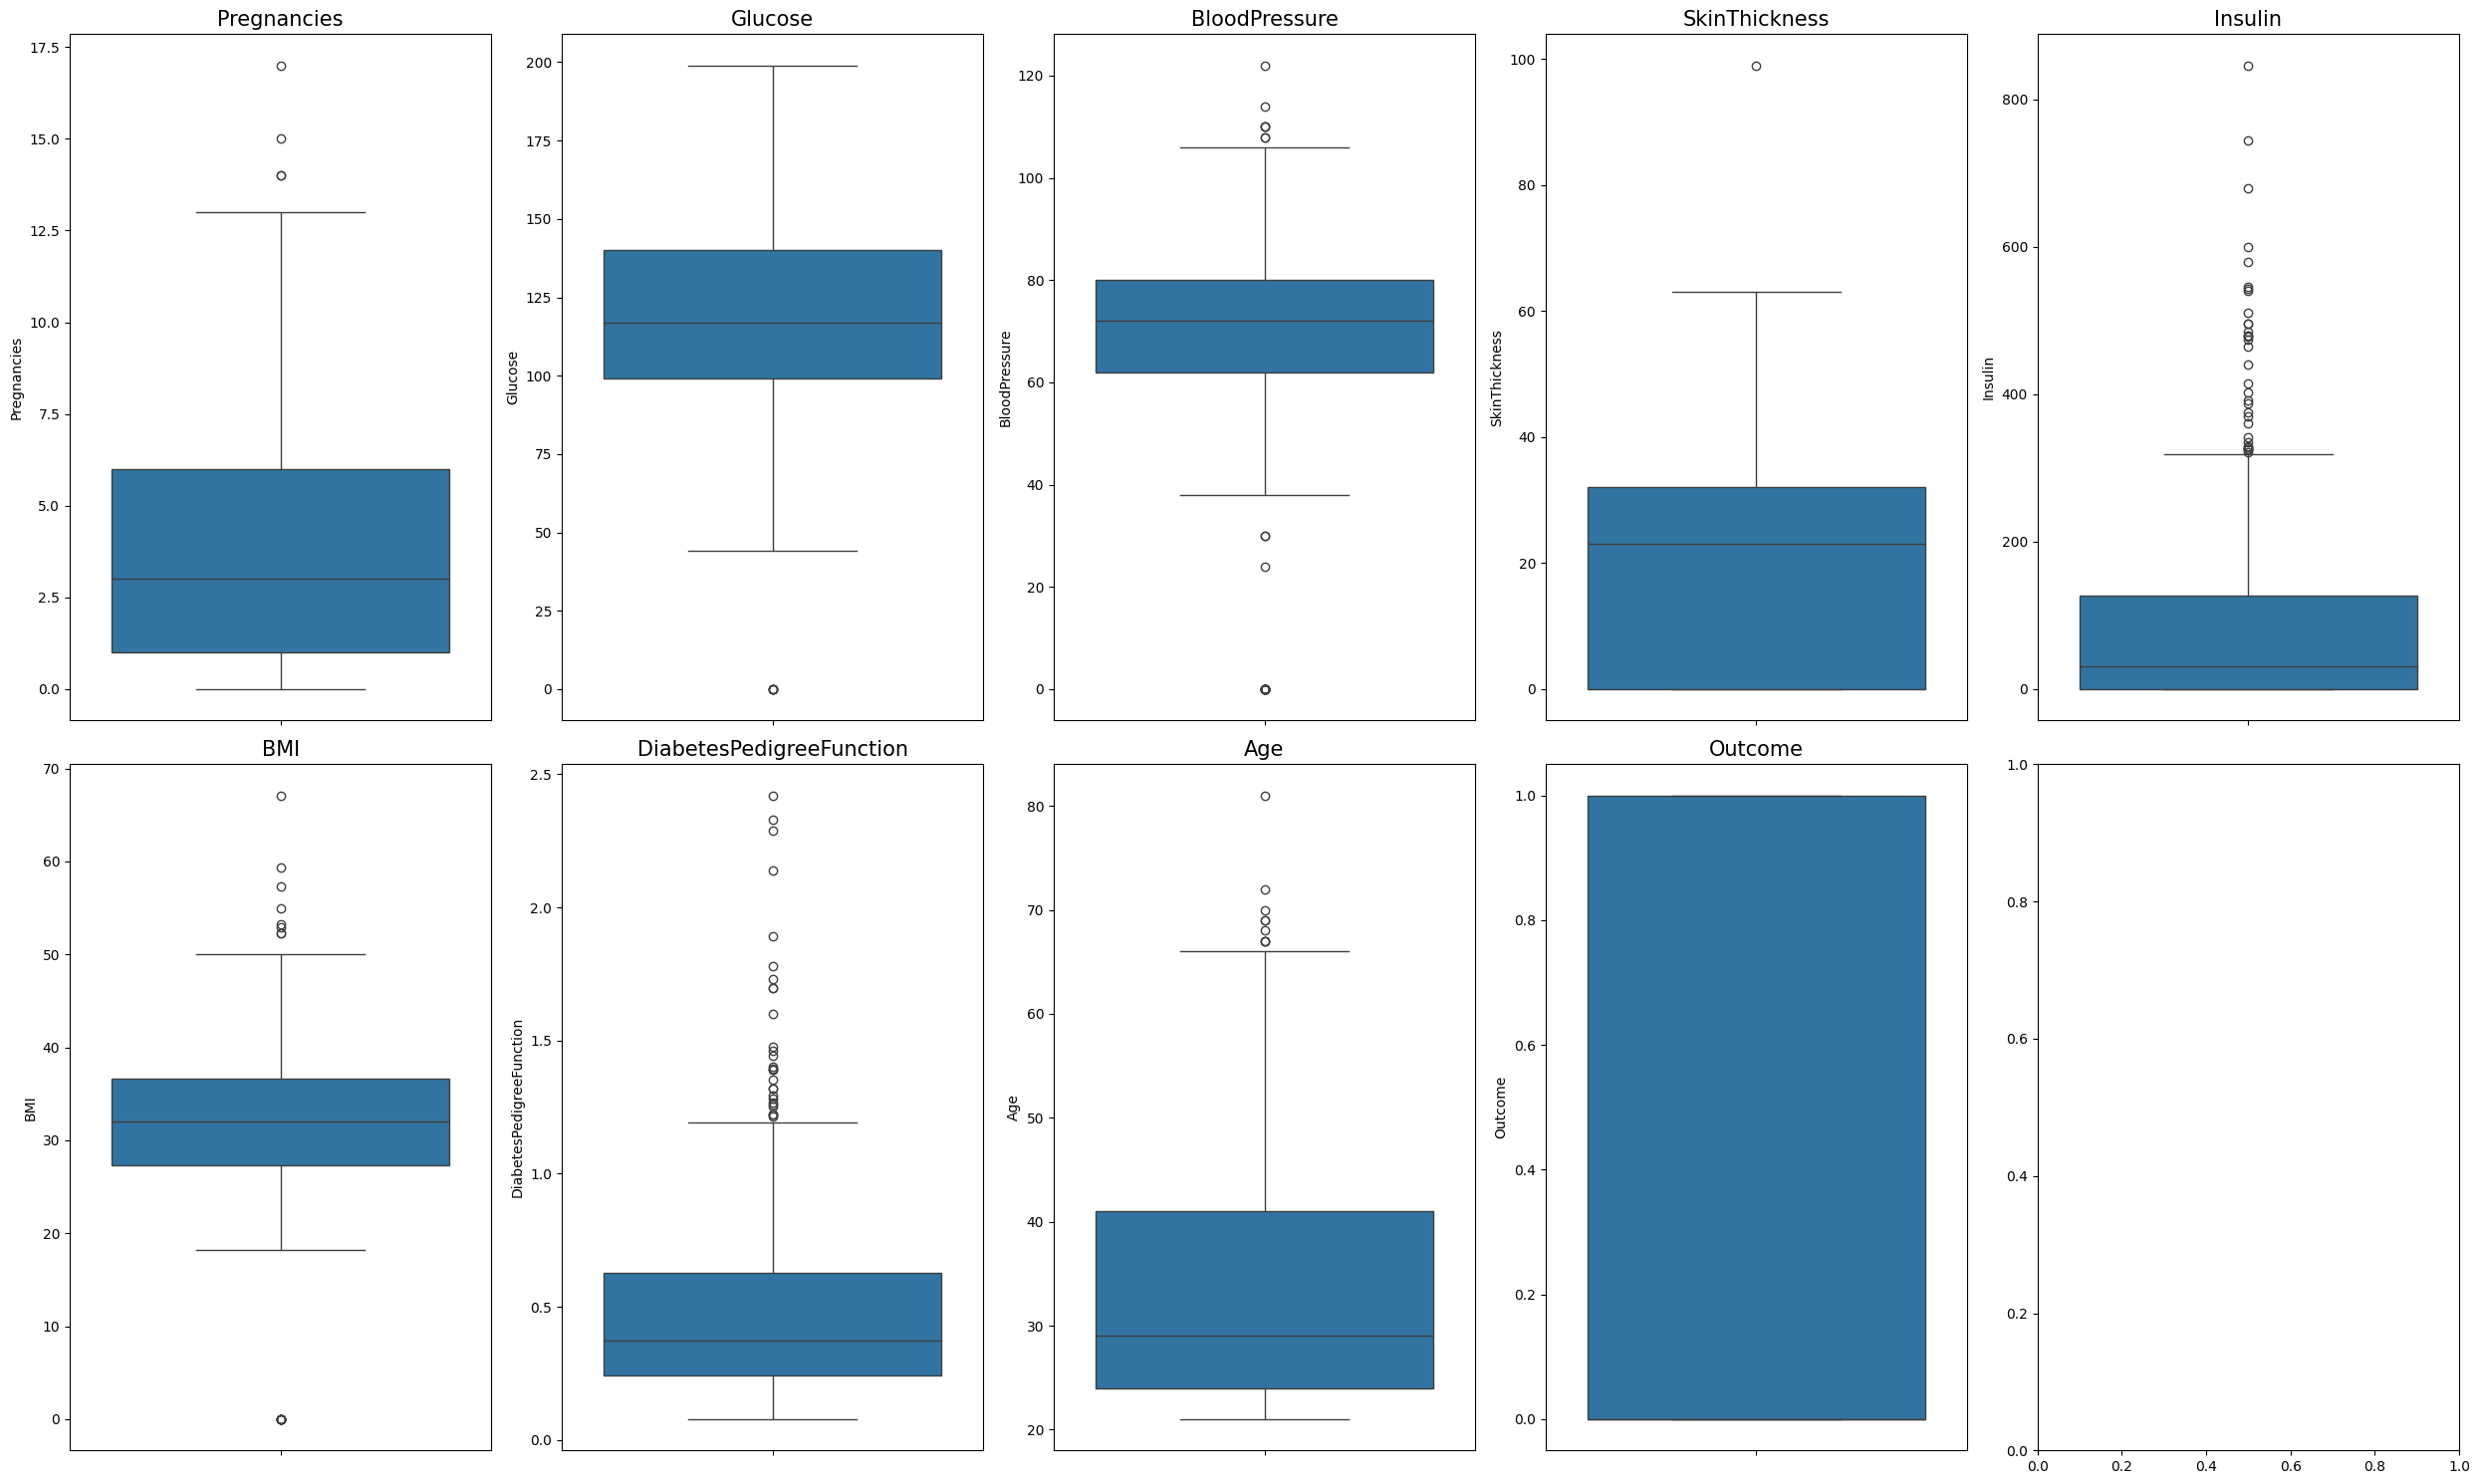

In [11]:
#Checking for outliers
fig, ax = plt.subplots(2, 5, figsize=(25, 15))

for i, subplots in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplots)
    subplots.set_title(i, fontsize=15)  # Set the title as the column name
    subplots.tick_params(axis='x', rotation=90, labelsize=15)

plt.tight_layout()
plt.show()


In [12]:
#boxplot suggests the presence of outliers.We need to treat it later

In [13]:
df_num=df.select_dtypes(include=np.number)
df_num

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df_num.shape

(768, 9)

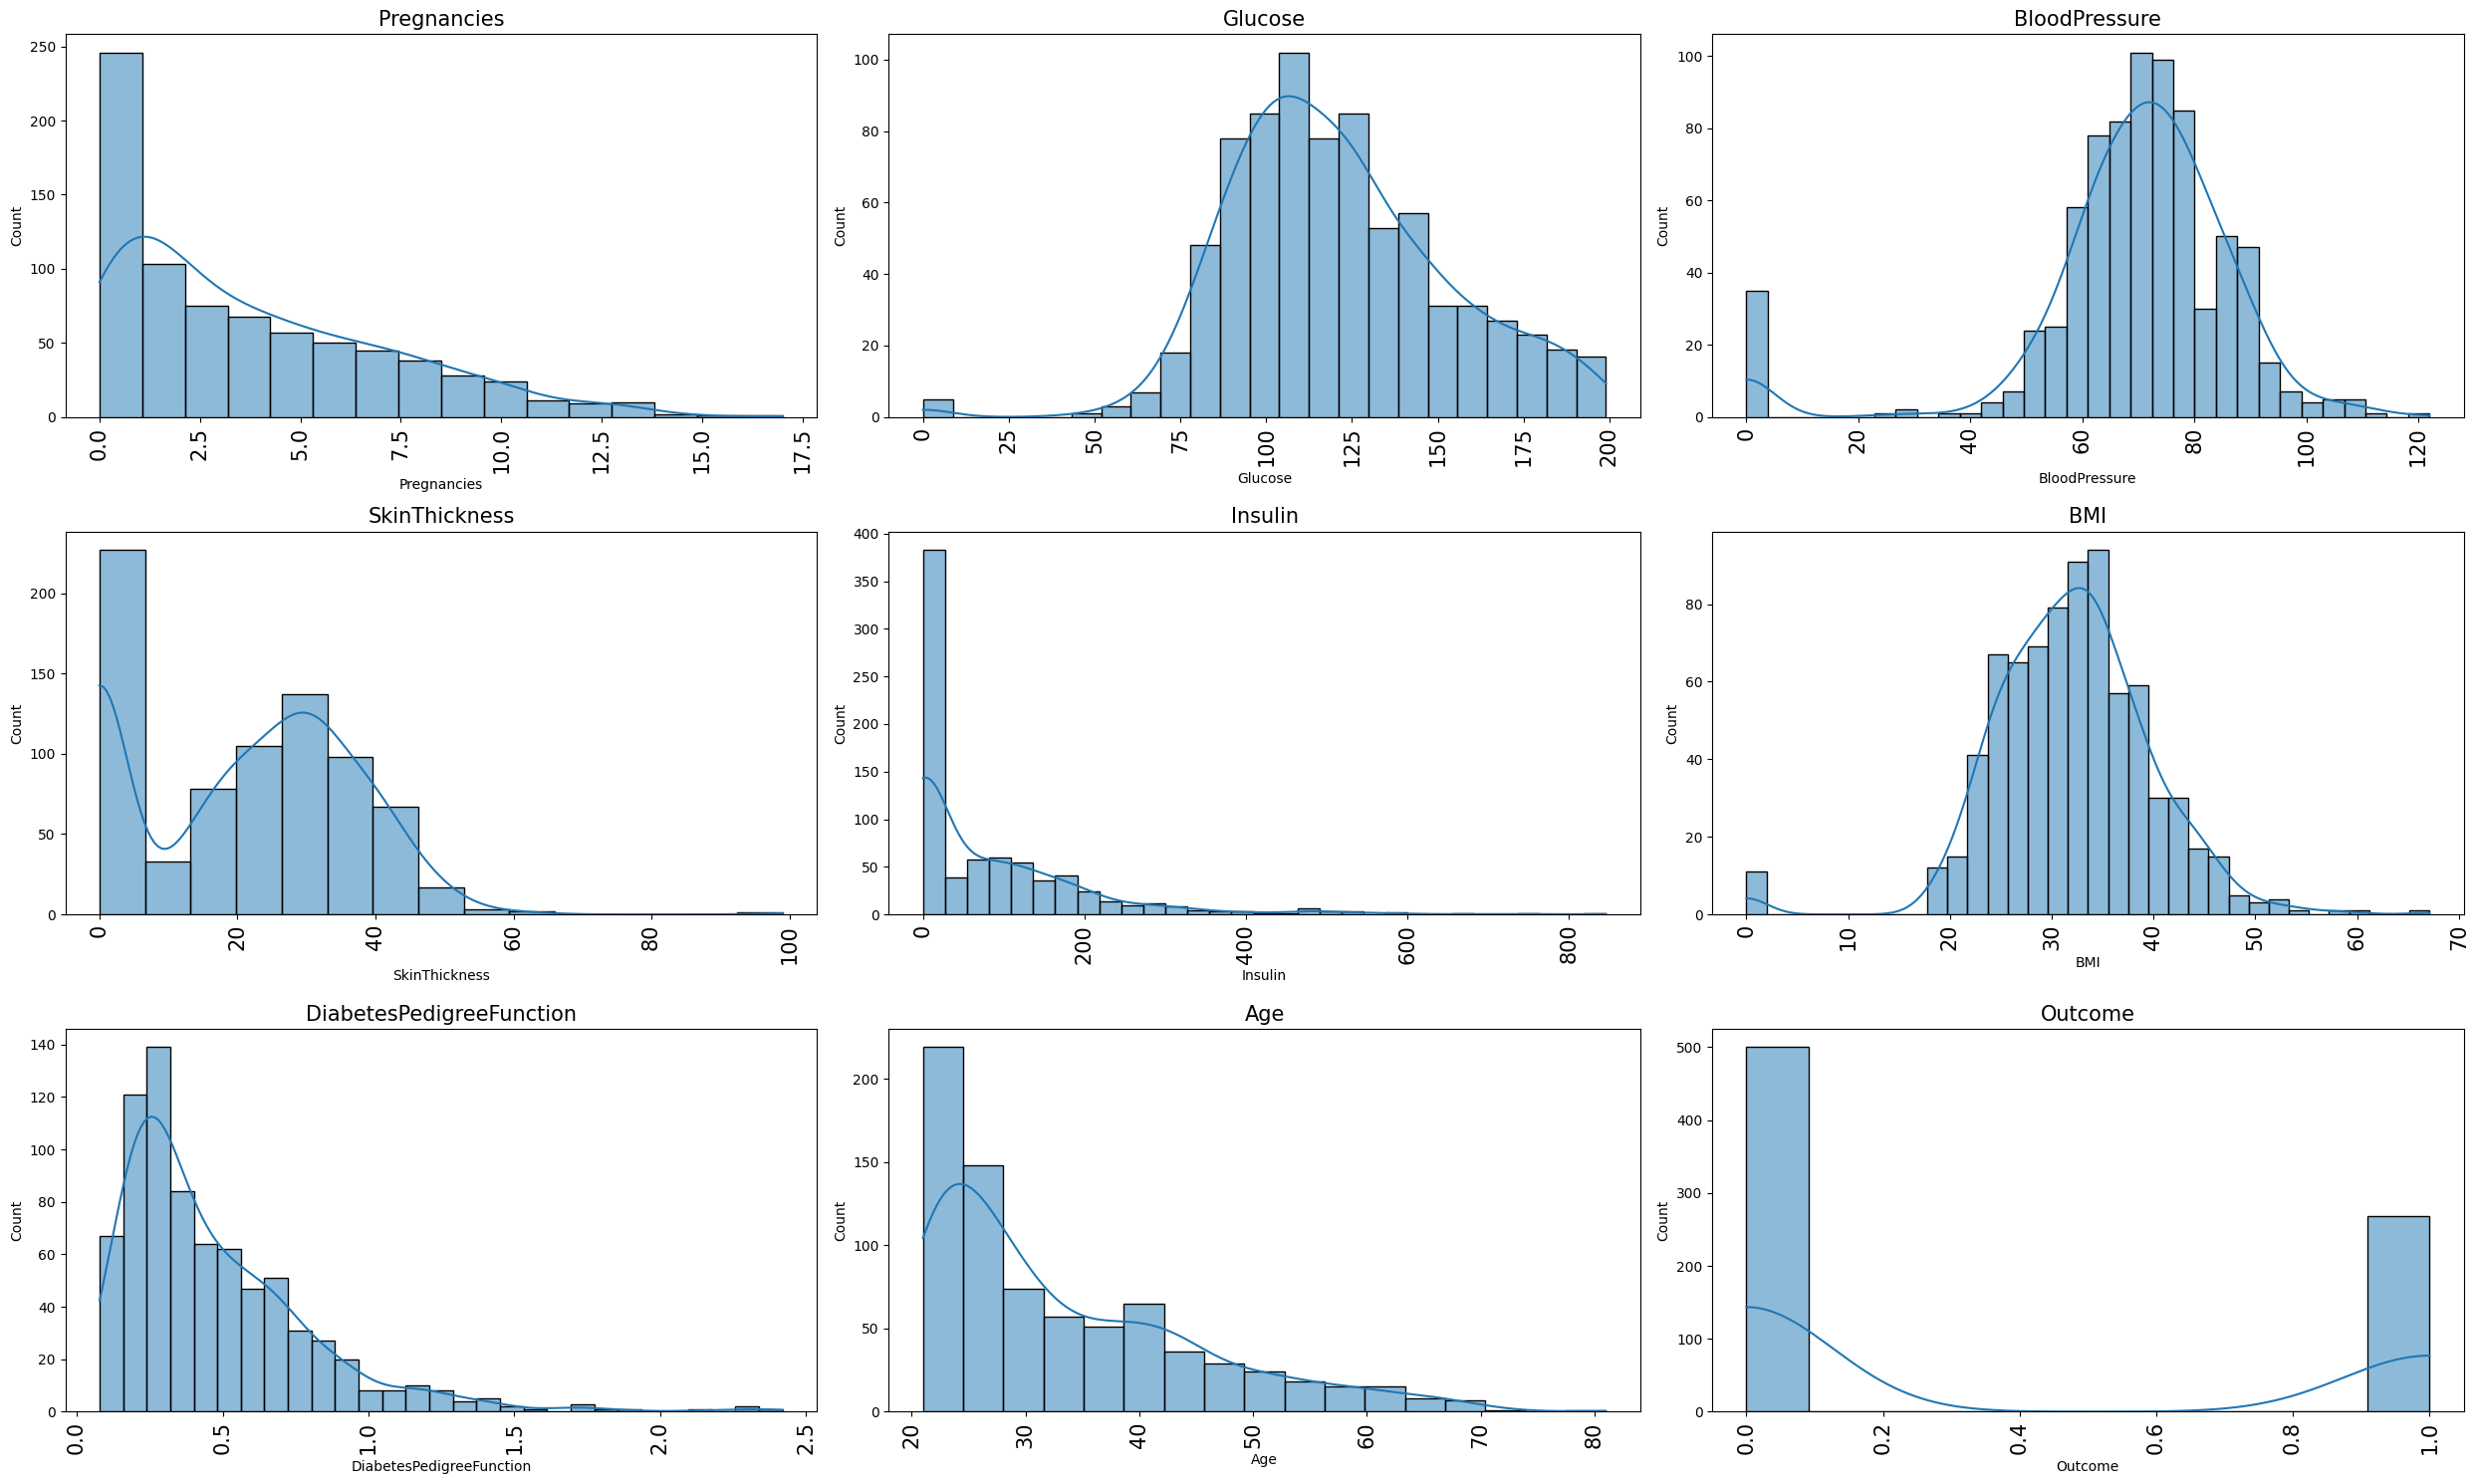

In [15]:
#Checking the skewness of the data
fig, ax = plt.subplots(3, 3, figsize=(25, 15))

for i, subplots in zip(cols, ax.flatten()):
    sns.histplot(df[i], ax=subplots,kde=True)
    subplots.set_title(i, fontsize=15)  # Set the title as the column name
    subplots.tick_params(axis='x', rotation=90, labelsize=15)

plt.tight_layout()
plt.show()


- Pregnancies,Insulin,DiabetesPedigreeFunction,Age columns are right skewed.

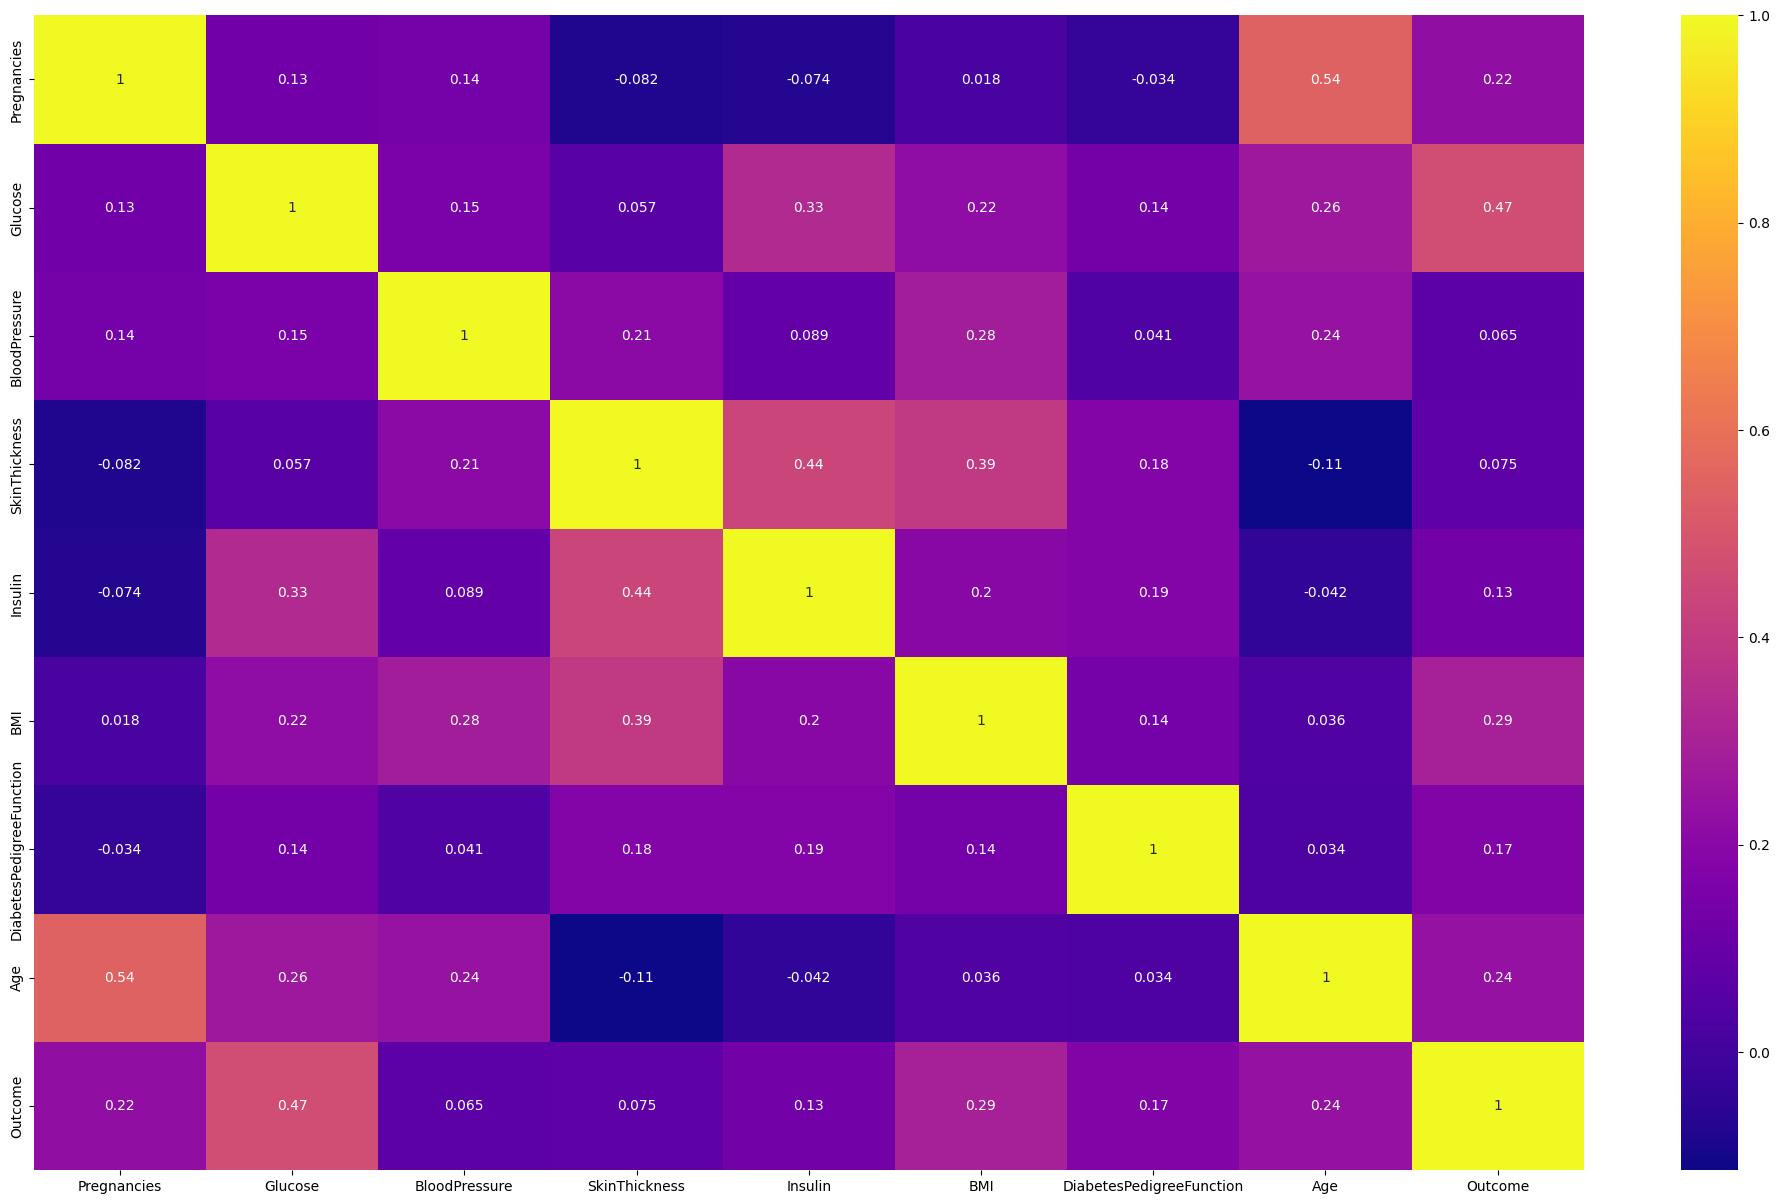

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

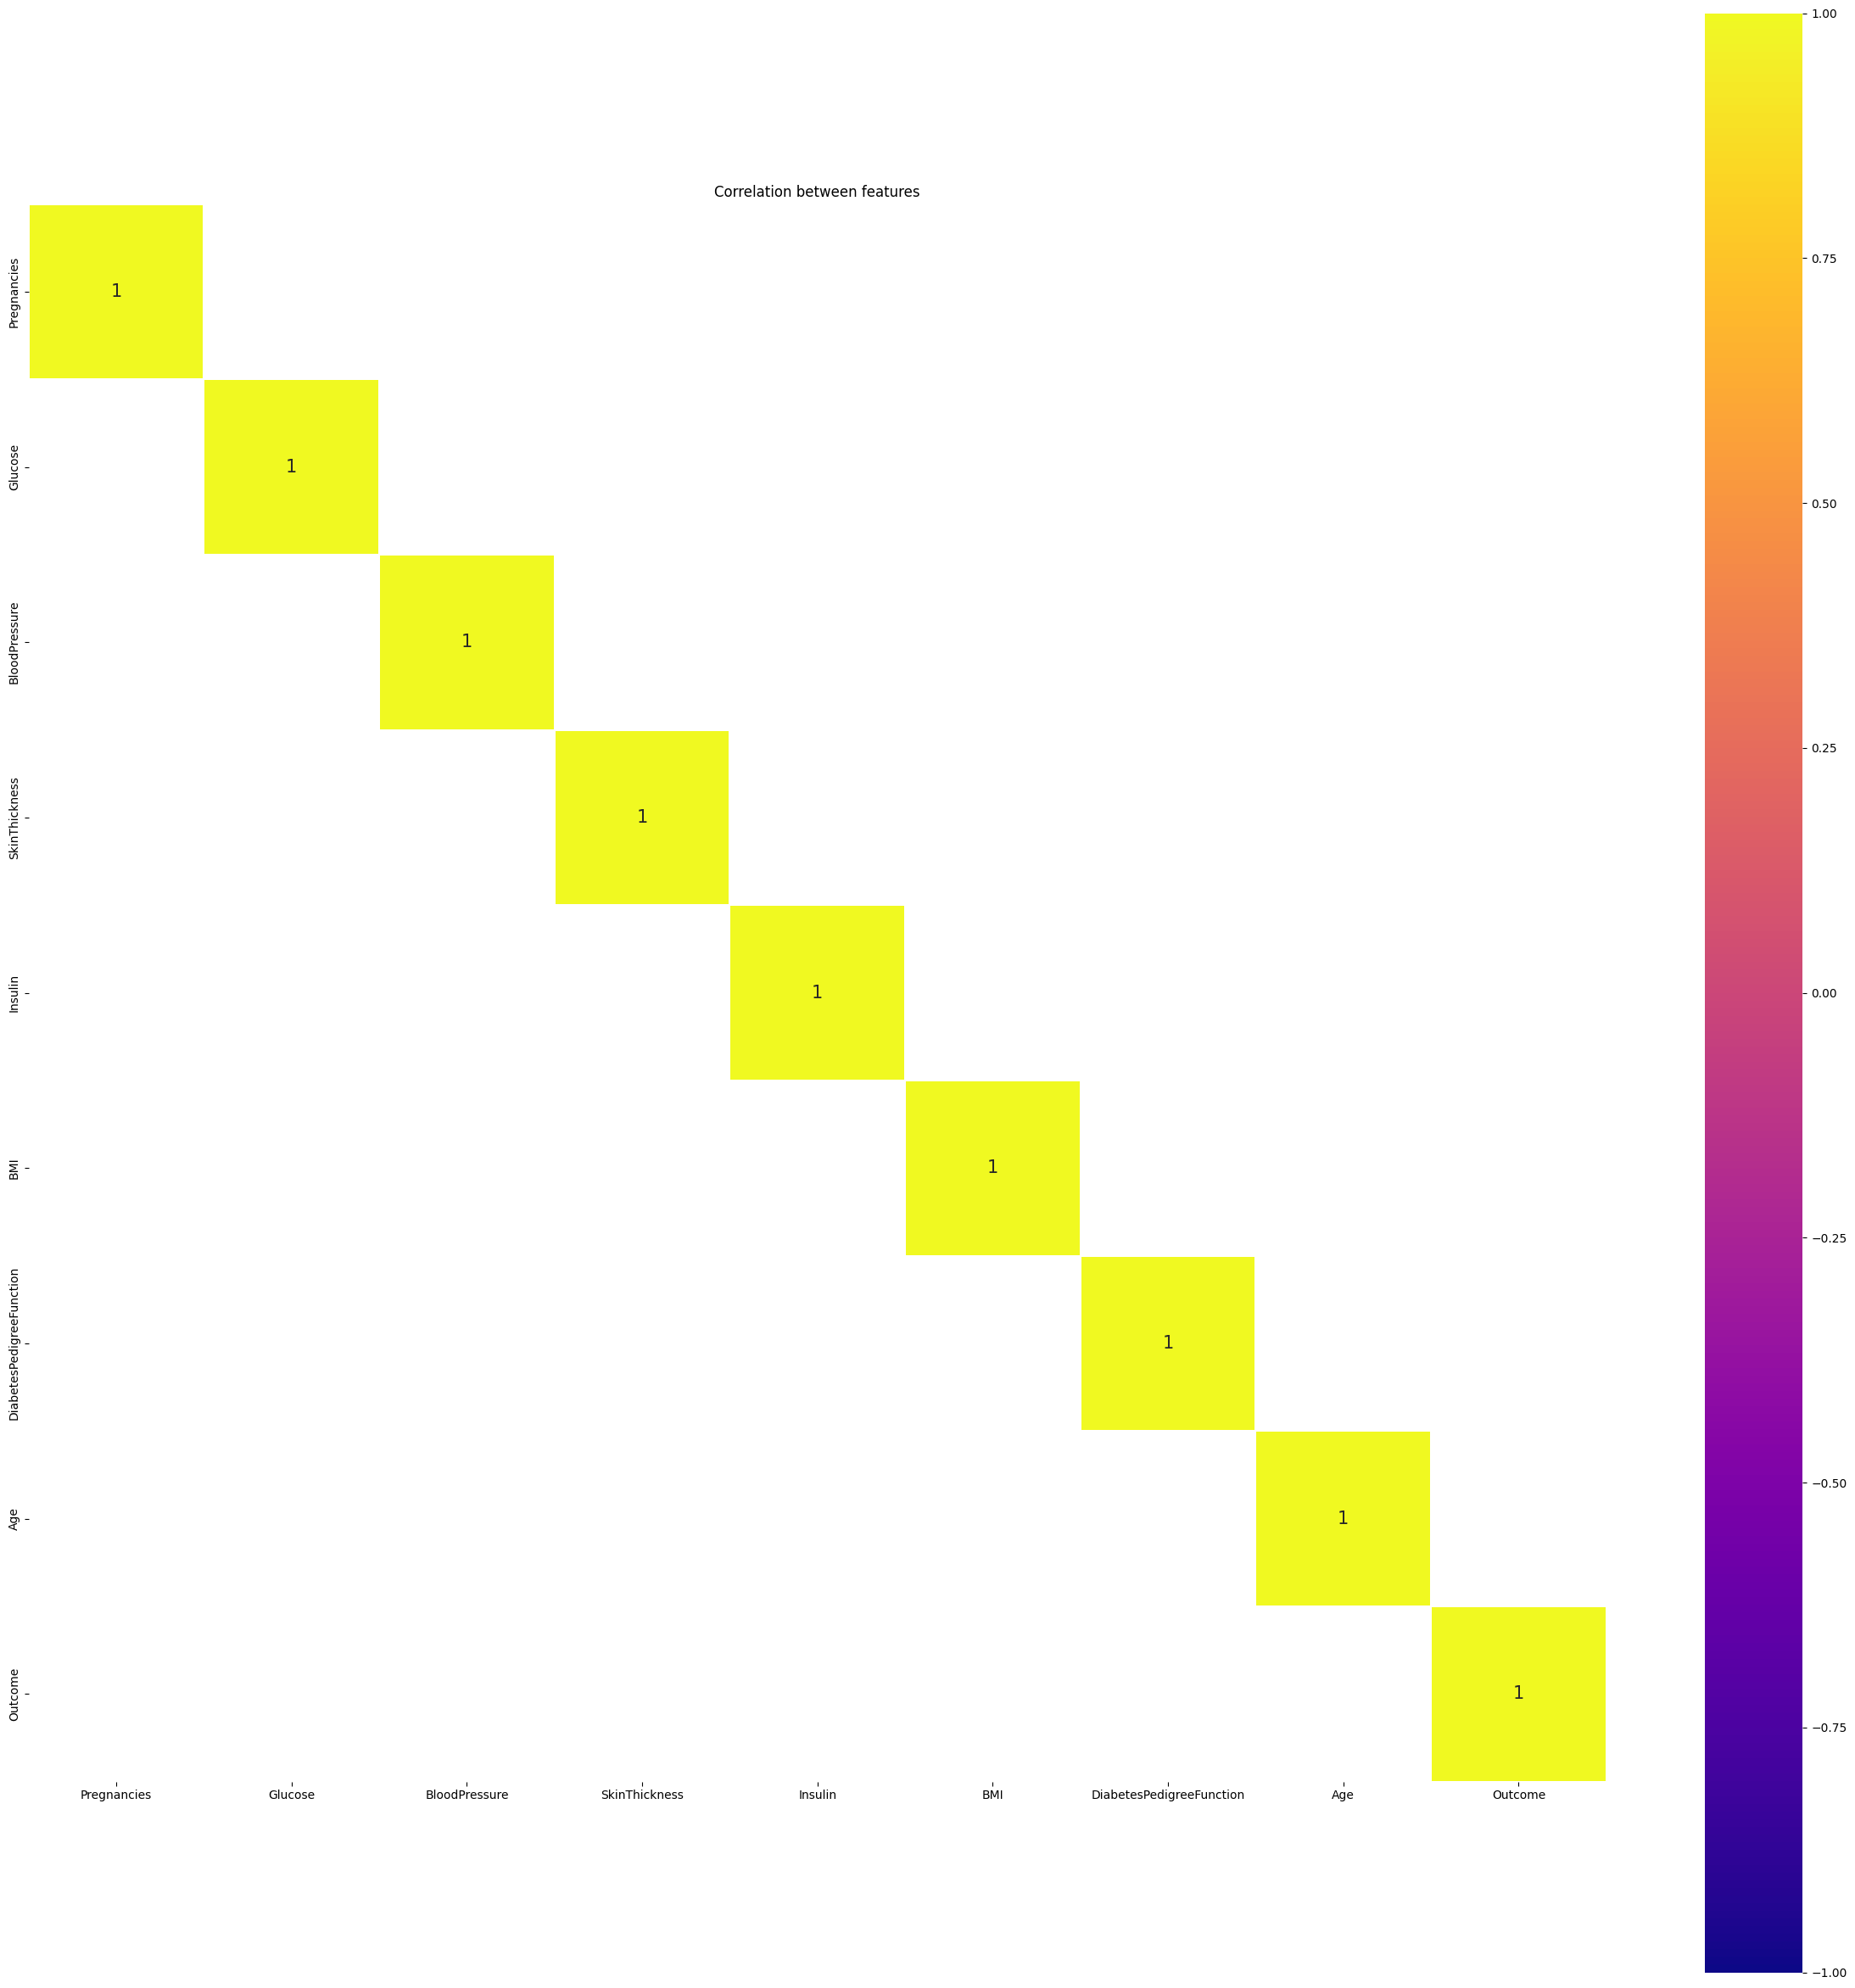

In [17]:
plt.figure(figsize=(30, 30))


sns.heatmap(df.corr()[(df.corr() >= 0.75) | (df.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

- There is no variables having high correlation among themselves

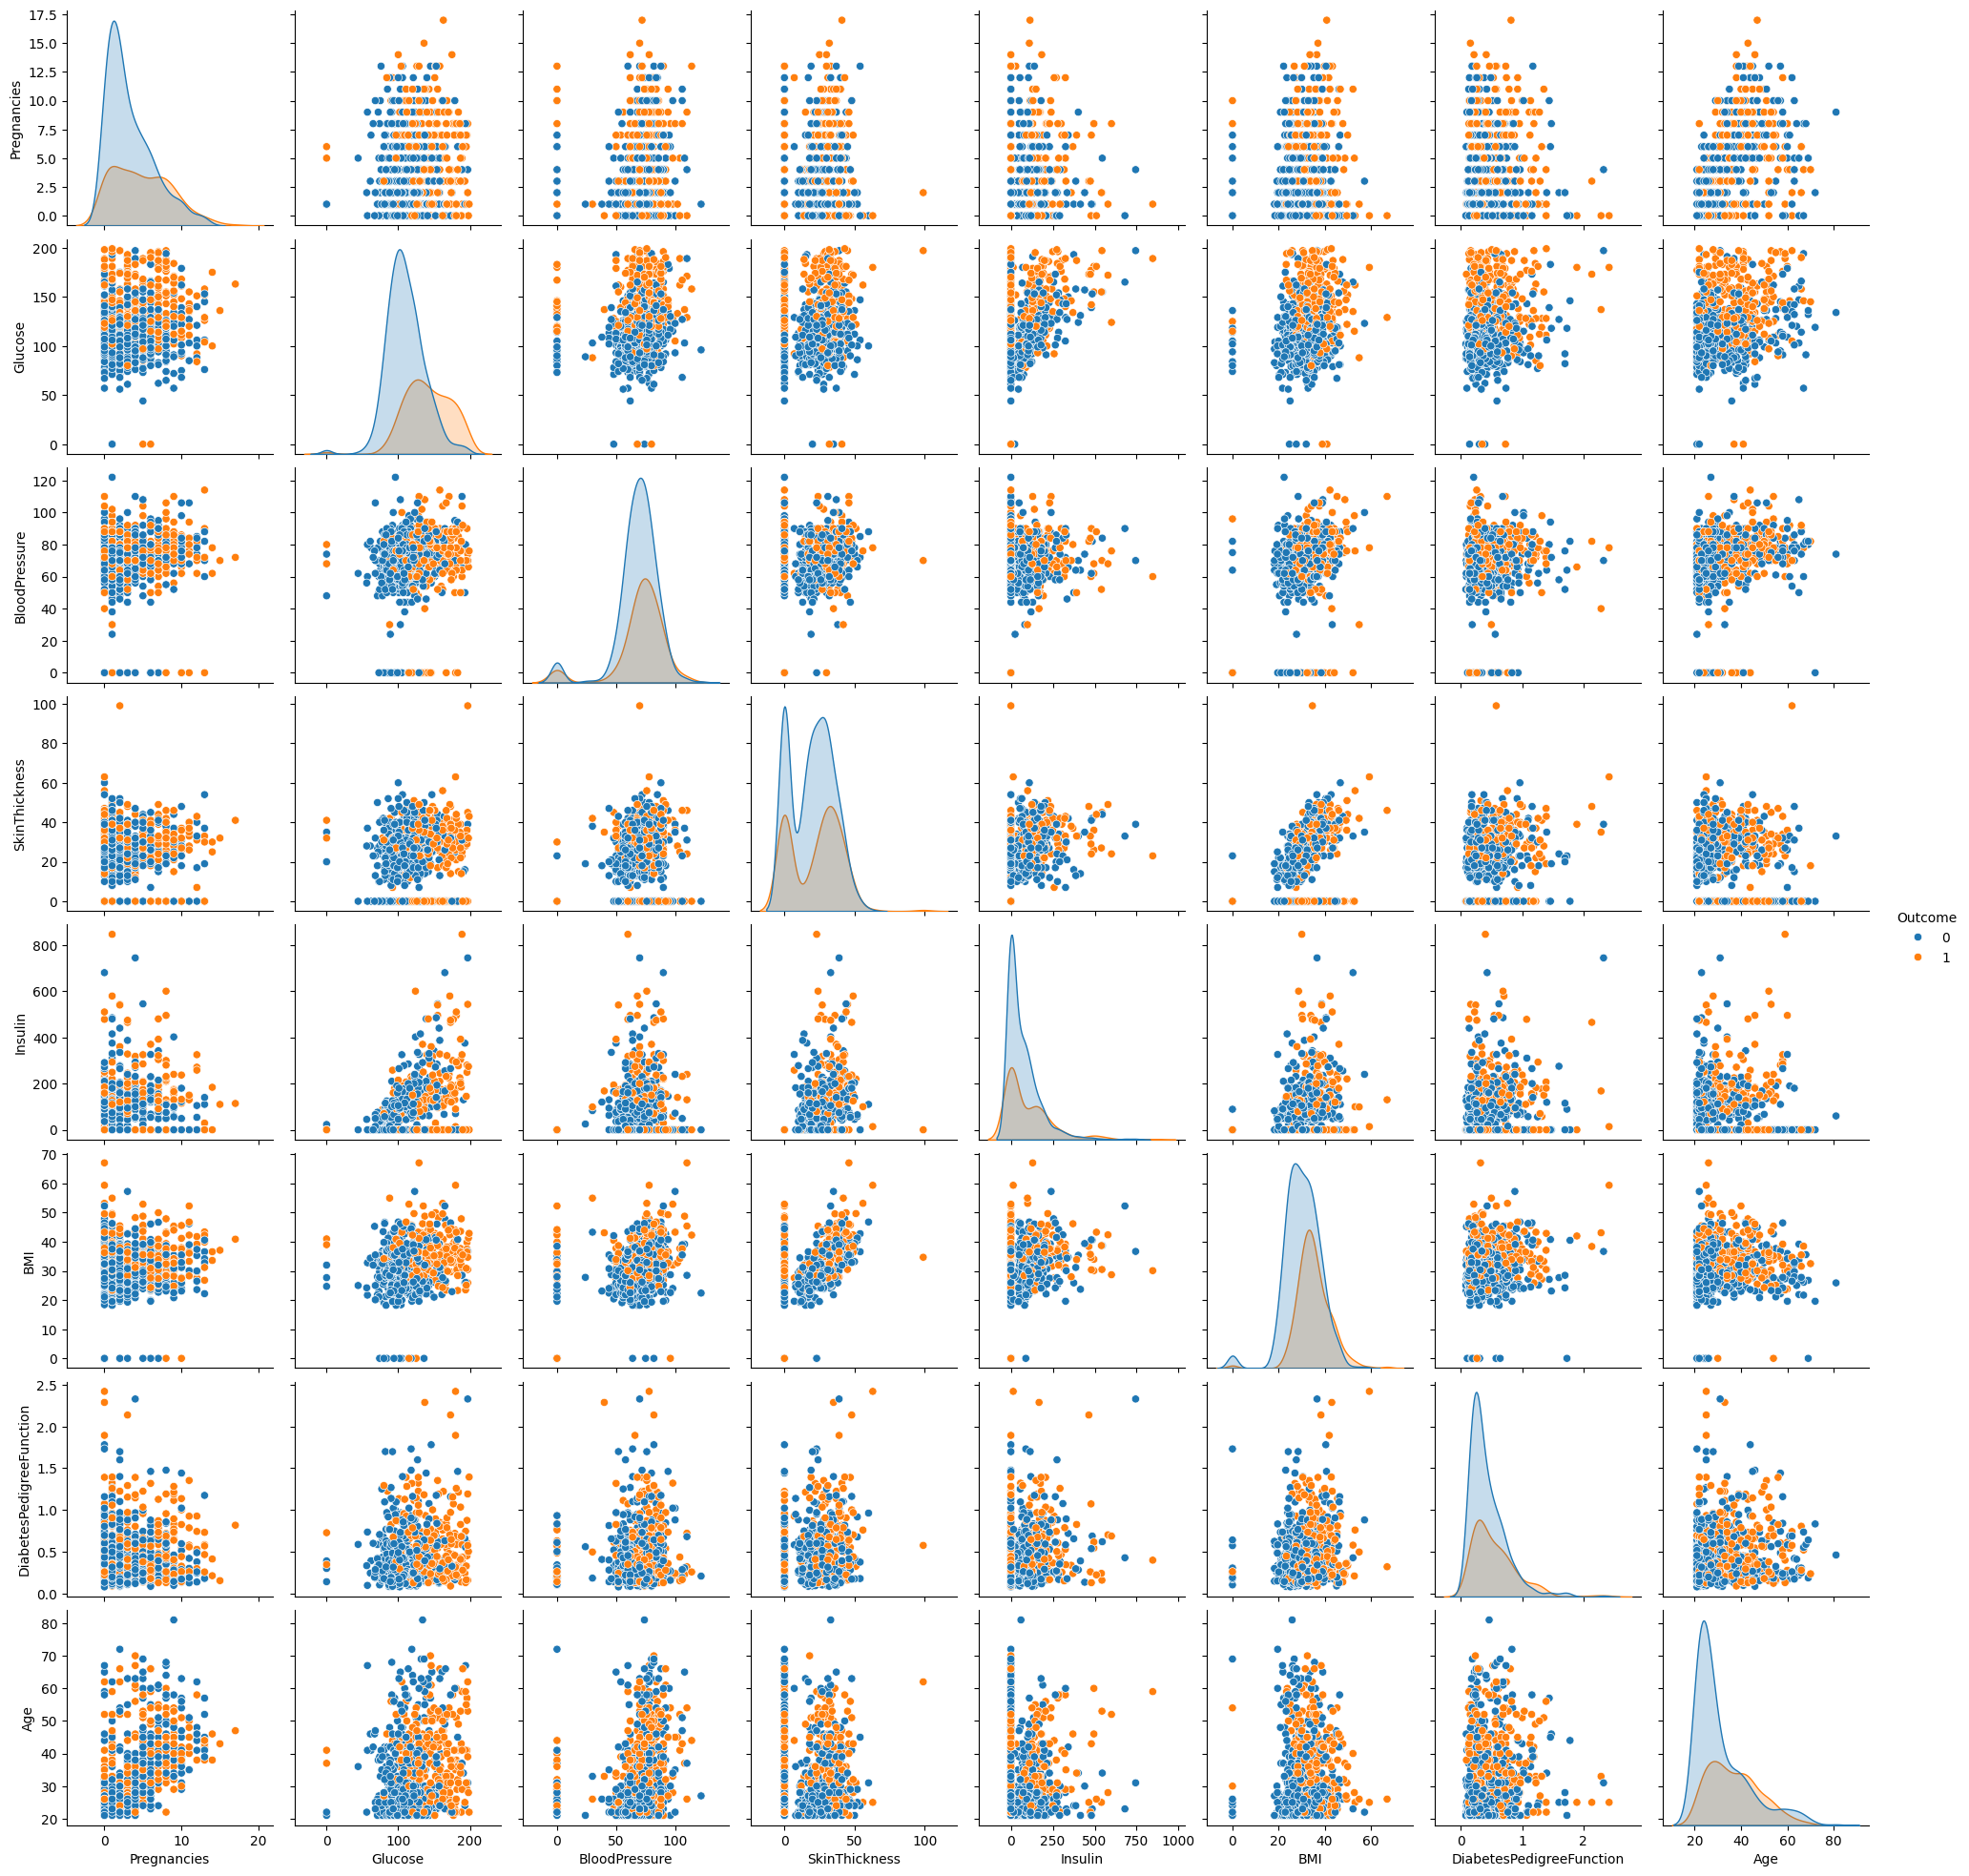

In [18]:
sns.pairplot(df, hue='Outcome')
plt.show()

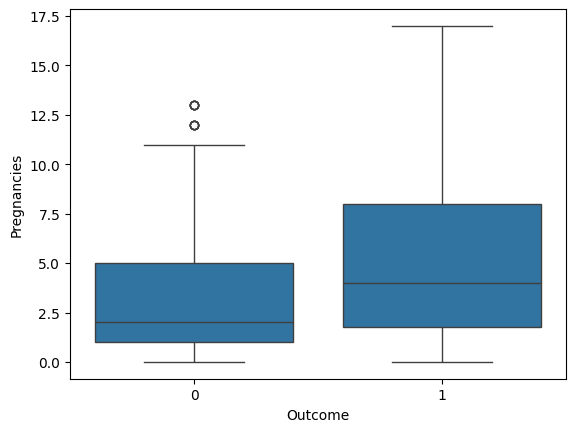

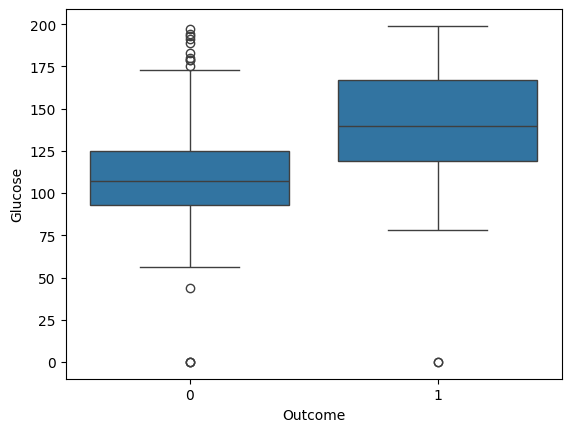

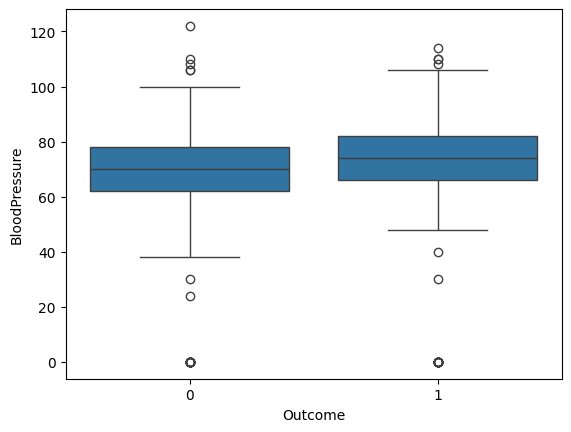

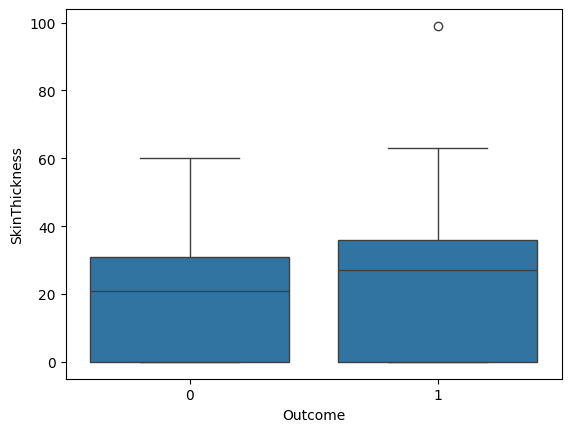

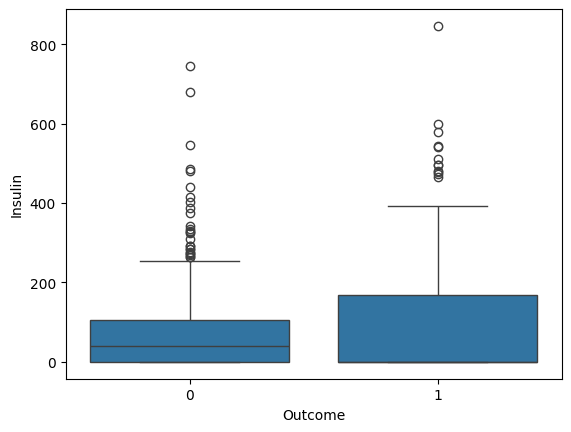

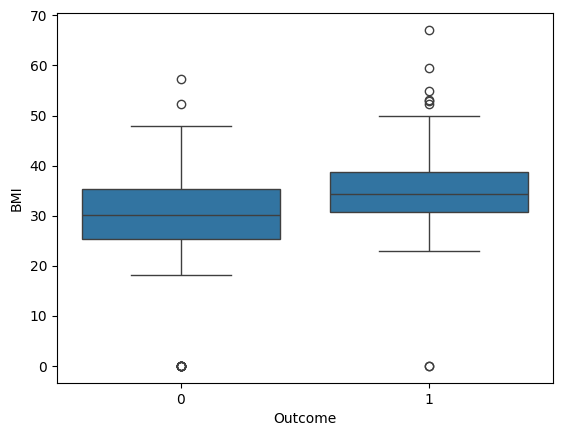

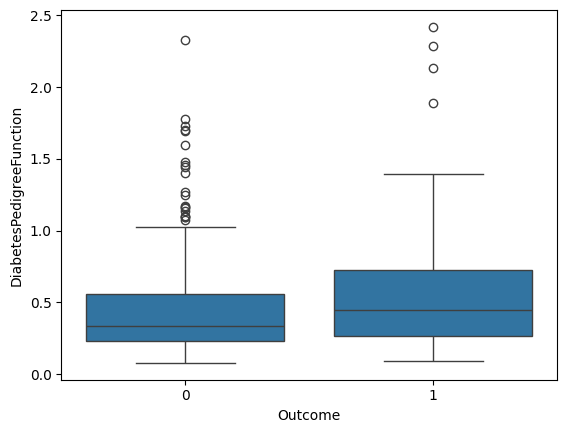

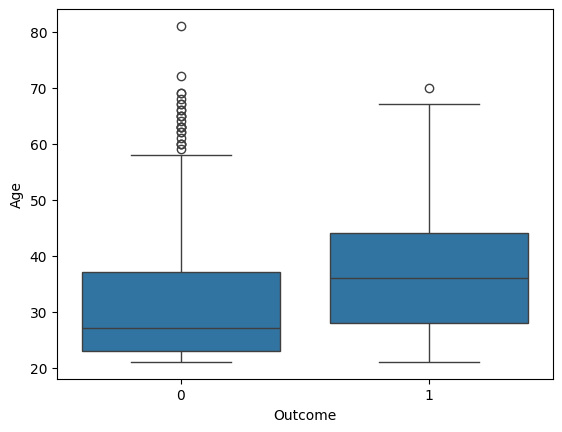

In [19]:
for column in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x='Outcome', y=column, data=df)


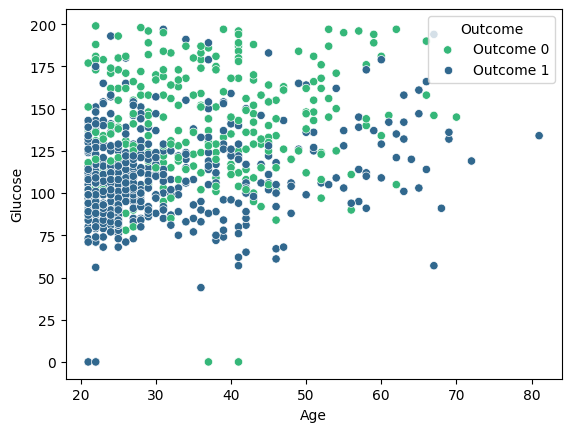

In [20]:
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend(title='Outcome', loc='upper right', labels=['Outcome 0', 'Outcome 1'])
plt.show()


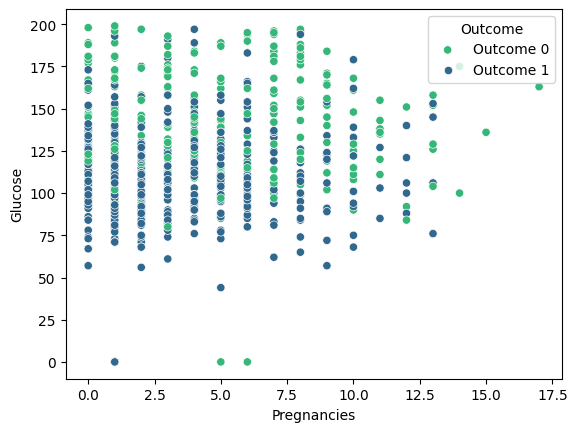

In [21]:
sns.scatterplot(x='Pregnancies', y='Glucose', hue='Outcome', data=df, palette='viridis')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.legend(title='Outcome', loc='upper right', labels=['Outcome 0', 'Outcome 1'])
plt.show()


In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
#Treating the outliers
for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    df[i]=df[i].apply(lambda x: uw if x>uw else lw if x<lw else x)

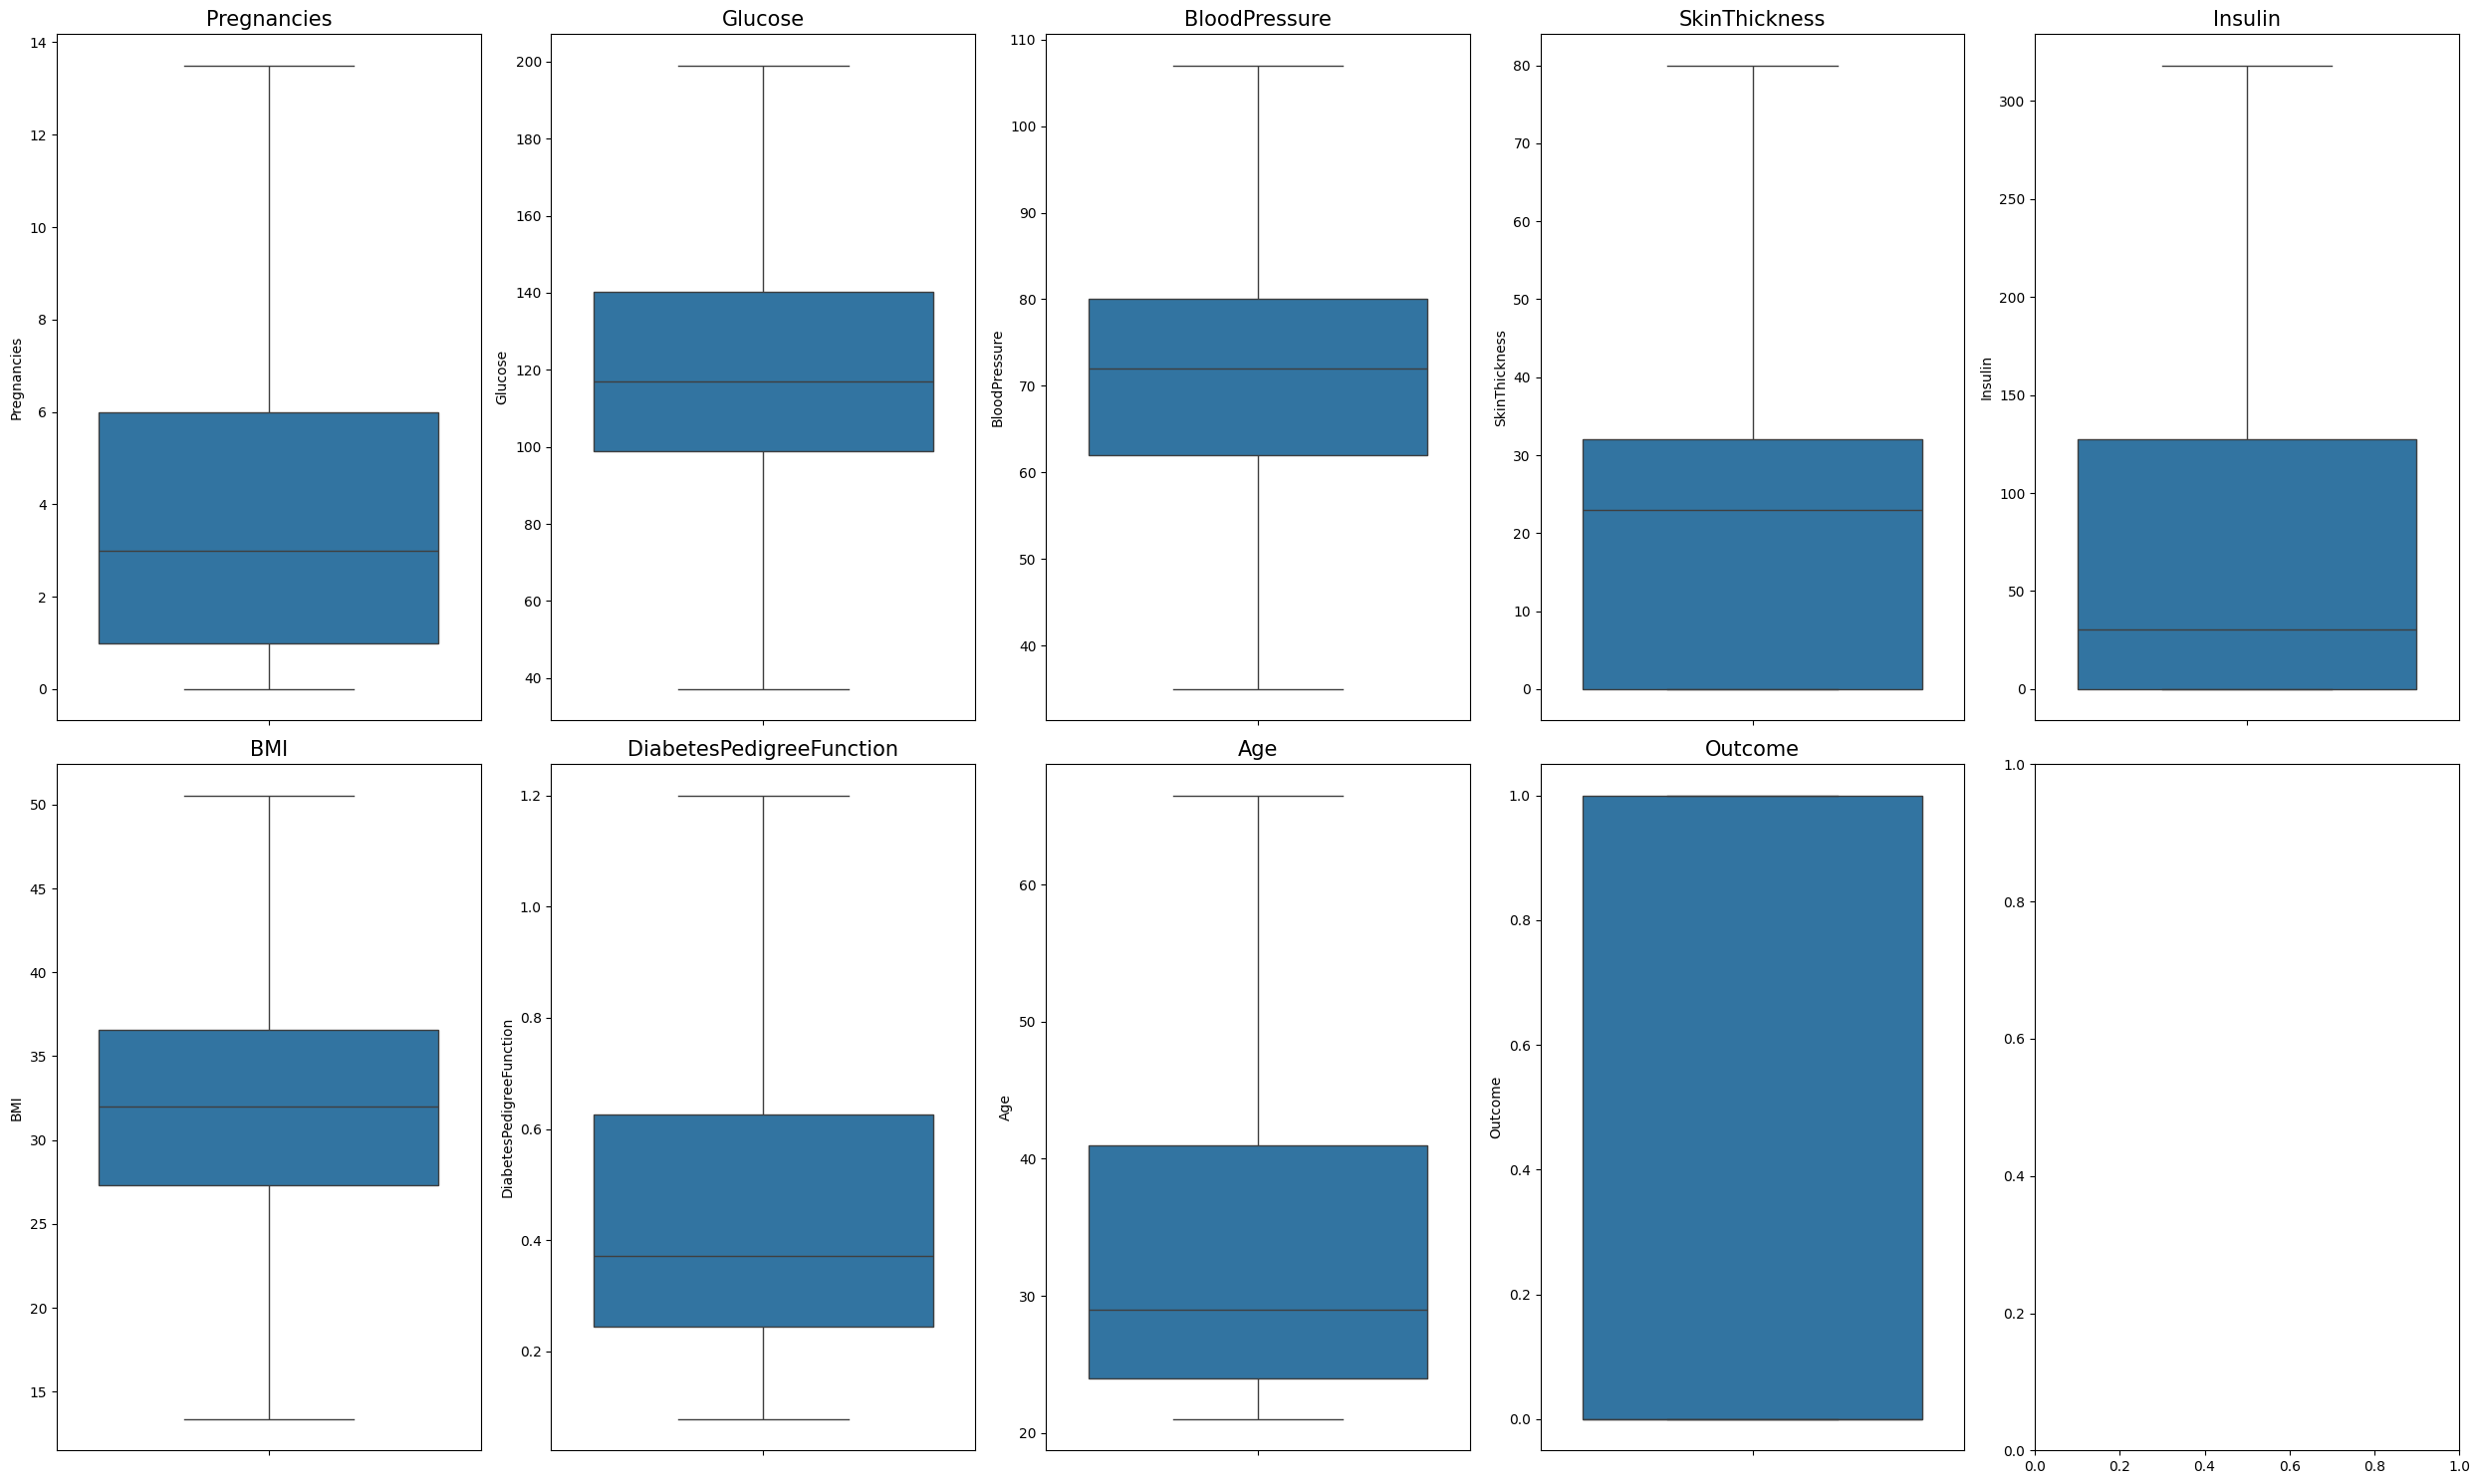

In [24]:
#Checking for outliers
fig, ax = plt.subplots(2, 5, figsize=(25, 15))

for i, subplots in zip(df, ax.flatten()):
    sns.boxplot(df[i], ax=subplots)
    subplots.set_title(i, fontsize=15)  # Set the title as the column name
    subplots.tick_params(axis='x', rotation=90, labelsize=15)

plt.tight_layout()
plt.show()


In [25]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

features = df.drop('Outcome', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the 'Outcome' column back to the scaled DataFrame
scaled_df['Outcome'] = df['Outcome']

# Now scaled_df contains the scaled features with the 'Outcome' column


In [26]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1


In [27]:
#Transforming the data
from sklearn.preprocessing import PowerTransformer

features = df.drop('Outcome', axis=1)
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_features = transformer.fit_transform(features)

transformed_df = pd.DataFrame(transformed_features, columns=features.columns)


transformed_df['Outcome'] = df['Outcome']




In [28]:
transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.815109,0.882414,0.037014,0.879302,-1.009997,0.227726,0.833782,1.368231,1
1,-0.835390,-1.195724,-0.390857,0.633164,-1.009997,-0.774827,-0.180759,0.125482,0
2,1.193017,1.836205,-0.528823,-1.430684,-1.009997,-1.263263,0.953203,0.229348,1
3,-0.835390,-1.043690,-0.390857,0.361784,0.868740,-0.556410,-1.295302,-1.479007,0
4,-1.601925,0.558783,-1.988213,0.879302,1.091875,1.530955,1.850649,0.326699,1


The above is transformed data

# MODEL BUILDING

# LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=transformed_df.drop(columns='Outcome')
y=transformed_df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
lr=LogisticRegression()

In [30]:
model=lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       146
           1       0.77      0.54      0.63        85

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[132,  14],
       [ 39,  46]], dtype=int64)

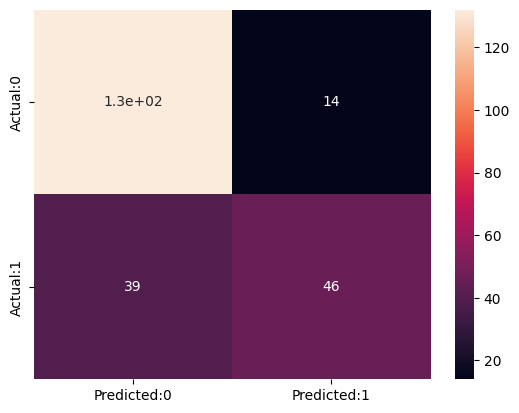

In [34]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

- As this a diabetes pediction model,our main aim is to reduce False Negative and False Postive along with good accuracy.
- A person having diabetes should be predicted as a diabetic.And a person not having diabetes should be predicted as non diabetic.

# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=10)
dt_params={'max_depth':np.arange(0,20),'min_samples_leaf':np.arange(2,10)}
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=10)

In [36]:
from sklearn.model_selection import GridSearchCV
dt_1=GridSearchCV(dt,dt_params,cv=kf,scoring='r2')
dt_1.fit(x_train,y_train)
dt_1.best_params_

{'max_depth': 2, 'min_samples_leaf': 2}

In [37]:
dt_tuned=DecisionTreeClassifier(max_depth=3,min_samples_leaf=7)
dt_tuned.fit(x_train,y_train)
pred_test=dt_tuned.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       146
           1       0.61      0.64      0.62        85

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[112,  34],
       [ 31,  54]], dtype=int64)

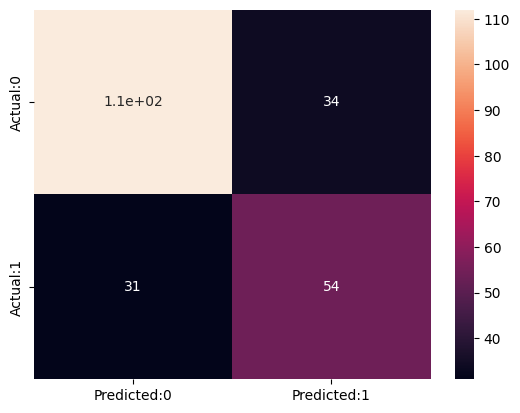

In [39]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

# RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_be=[]
rf_ve=[]
for n in range(1,10):
    rf=RandomForestClassifier(n_estimators=n,random_state=10)
    kf=KFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(rf,x_train,y_train,cv=kf,scoring='r2')
    rf_ve.append(np.std(np.abs(scores)))

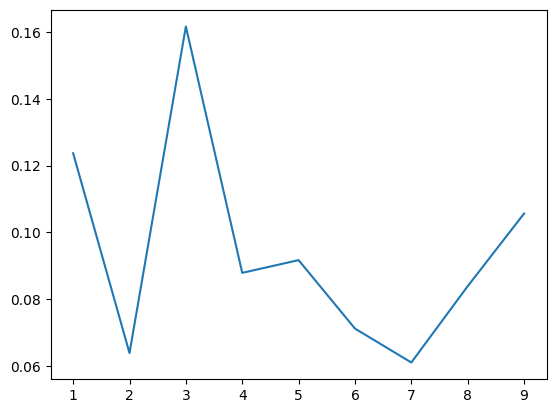

In [41]:
x_axis=np.arange(1,10)
plt.plot(x_axis,rf_ve)

In [42]:
rf_tuned=RandomForestClassifier(n_estimators=2,random_state=0)
rf_tuned.fit(x_train,y_train)
pred_test=rf_tuned.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78       146
           1       0.62      0.28      0.39        85

    accuracy                           0.67       231
   macro avg       0.65      0.59      0.58       231
weighted avg       0.66      0.67      0.63       231



In [43]:
rf=RandomForestClassifier(random_state=10)
rf_params={'n_estimators':np.arange(1,20)}
kf=KFold(n_splits=5,shuffle=True,random_state=10)
gs=GridSearchCV(rf,rf_params,cv=kf,scoring='r2')
gs.fit(x_train,y_train)
gs.best_params_

{'n_estimators': 15}

In [44]:
rf_tuned=RandomForestClassifier(n_estimators=15)
rf_tuned.fit(x_train,y_train)
pred_test=rf_tuned.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       146
           1       0.73      0.56      0.64        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_be = []  # List to store bias error
rf_ve = []  # List to store variance error

for n in range(1, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=10)
    kf = KFold(n_splits=5, shuffle=True, random_state=10)
    
    # Use an appropriate classification metric like accuracy
    scores = cross_val_score(rf, x_train, y_train, cv=kf, scoring='accuracy')
    
    # Calculate bias error (mean of scores)
    rf_be.append(np.mean(scores))
    
    # Calculate variance error (standard deviation of scores)
    rf_ve.append(np.std(scores))

# Now rf_be and rf_ve contain the bias and variance errors for different values of n_estimators.


In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # adjust these values based on your needs
    'max_depth': [None, 10, 20, 30],  # adjust these values based on your needs
    'min_samples_split': [2, 5, 10],  # adjust these values based on your needs
    'min_samples_leaf': [1, 2, 4]  # adjust these values based on your needs
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=10)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
CPU times: total: 1min 14s
Wall time: 2min 9s


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=10,
    random_state=10
)

# Fit the model to the training data
best_rf_model.fit(x_train, y_train)

# Make predictions on the test set
pred_test = best_rf_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, pred_test))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       146
           1       0.72      0.54      0.62        85

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[128,  18],
       [ 39,  46]], dtype=int64)

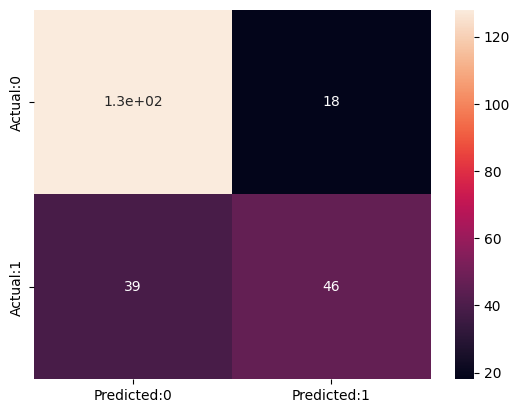

In [49]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

# NAIVE BAYES

In [50]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
model_gb=gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       146
           1       0.66      0.58      0.62        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[121,  25],
       [ 36,  49]], dtype=int64)

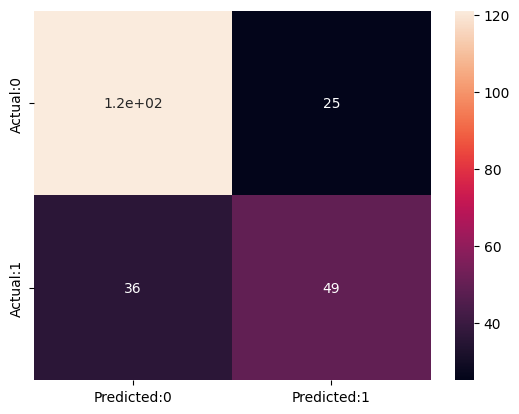

In [52]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [53]:
from sklearn.naive_bayes import BernoulliNB
bb=BernoulliNB()
model_gb=bb.fit(x_train,y_train)
pred_test=bb.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       146
           1       0.59      0.51      0.54        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231



# BOOSTING

## GRADIENT BOOSTING

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
gb_params={'n_estimators':np.arange(1,30)}
kf=KFold(n_splits=5,shuffle=True,random_state=10)
gcv=GridSearchCV(gb,gb_params,cv=kf,scoring='r2')
gcv.fit(x_train,y_train)
gcv.best_params_


{'n_estimators': 17}

In [55]:
gb_tuned=GradientBoostingClassifier(n_estimators=21)
gb_tuned.fit(x_train,y_train)
pred_test=gb_tuned.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       146
           1       0.74      0.54      0.63        85

    accuracy                           0.76       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[130,  16],
       [ 39,  46]], dtype=int64)

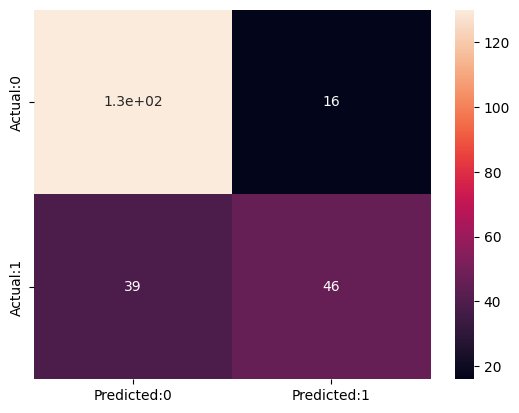

In [57]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

# Doing Oversampling using SMOTE

In [58]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
X_bal=transformed_df.drop('Outcome',axis=1)
y_bal=transformed_df['Outcome']

smote = SMOTE()

# Apply SMOTE to balance the data
X_balanced, y_balanced = smote.fit_resample(X_bal,y_bal)

# Check the class distribution after balancing
print(y_balanced.value_counts())


1    500
0    500
Name: Outcome, dtype: int64


# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size=0.3, random_state=42)

In [63]:
#Step 3-Call the model
lr=LogisticRegression()
#Step 4-Fit the model
model=lr.fit(X_train,y_train)
#Step 5-Predict using the model
pred_test=lr.predict(X_test)

In [64]:
#Step 6-Evaluation Matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       149
           1       0.76      0.76      0.76       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[112,  37],
       [ 36, 115]], dtype=int64)

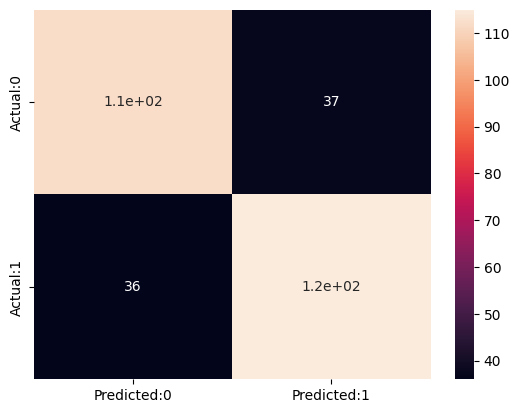

In [66]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

# RandomForestClassifier

In [67]:
rf=RandomForestClassifier(random_state=10)
rf_params={'n_estimators':np.arange(1,20)}
kf=KFold(n_splits=5,shuffle=True,random_state=10)
gs=GridSearchCV(rf,rf_params,cv=kf,scoring='r2')
gs.fit(X_train,y_train)
gs.best_params_

{'n_estimators': 17}

In [68]:
rf_tuned1=RandomForestClassifier(n_estimators=18)
rf_tuned1.fit(X_train,y_train) 
pred_test=rf_tuned1.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       149
           1       0.75      0.79      0.77       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[110,  39],
       [ 31, 120]], dtype=int64)

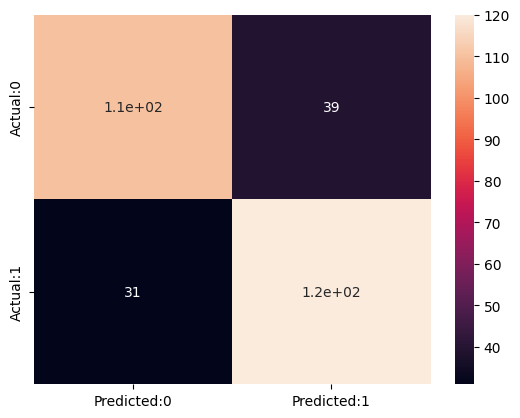

In [70]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

# GradientBoostingClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb_tuned=GradientBoostingClassifier(n_estimators=29)
gb_tuned.fit(X_train,y_train)
pred_test=gb_tuned.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.70      0.76       149
           1       0.74      0.84      0.79       151

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
cm
#Output always in the form of array and we need to convert into dataframe

array([[105,  44],
       [ 24, 127]], dtype=int64)

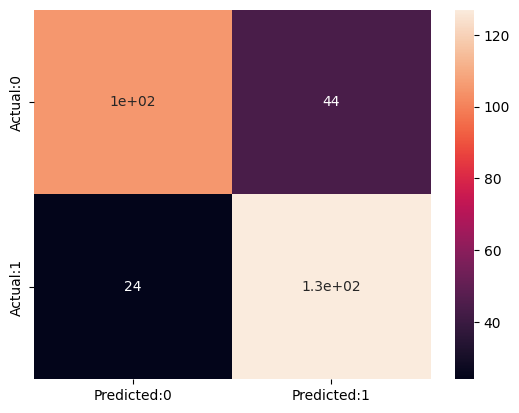

In [73]:
#As we are passing the dataframe of confusion matrix so we are passing columns as predicted and rows as actual
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

### Based on all the models made we have come to the conclusion that Random Forest Classifier is giving us best accuracy of nearly 78%

# Prepare for deployment by creating a pipeline

In [74]:
from sklearn.pipeline import Pipeline

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def print_metrics(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{label} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Now, you can use this function in your code
sc = StandardScaler()
model = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=18, random_state=10)
steps = [("scaler", sc), ("model", model)]
pipeline = Pipeline(steps) 

# Assuming X_train, X_test, y_train, y_test are already defined
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print_metrics(y_test, y_pred, "Pipeline")


Pipeline Metrics:
Accuracy: 0.7800
Precision: 0.7515
Recall: 0.8411
F1 Score: 0.7937

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.76       149
           1       0.75      0.84      0.79       151

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

